<a href="https://colab.research.google.com/github/Rishika70/Hack_To_Hire/blob/main/Hack_To_Hire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hack_To_Hire By Rishika Rai

# **Introduction**

Problem Statement: Develop a state-of-the-art question-answering model leveraging the Quora
Question Answer Dataset. The objective is to create an AI system capable of understanding and
generating accurate responses to a variety of user queries, mimicking a human-like interaction.

Import Necessary Libraries

In [ ]:
!pip install huggingface

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets transformers


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertModel
from transformers import T5Tokenizer, T5Model
from transformers import GPT2Tokenizer, GPT2Model
from nltk.translate.bleu_score import sentence_bleu
from transformers import BertTokenizer, DataCollatorWithPadding
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import re
import html
from collections import Counter
from transformers import TFBertForSequenceClassification, BertTokenizer, create_optimizer
import tensorflow as tf
from datasets import load_dataset
import torch
from transformers import BertTokenizer




In [ ]:
# Tokenize the data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load Dataset

In [ ]:
dataset = load_dataset("toughdata/quora-question-answer-dataset")
df = pd.DataFrame(dataset['train'])  # Convert the dataset to a DataFrame


# Split dataset

In [ ]:
train_test_split = dataset['train'].train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
validation_dataset = train_test_split['test']

# **Analyze the Data**

In [ ]:
print(df.head())


                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 881.4+ KB
None


In [ ]:
print(df.describe())


                                                 question answer
count                                               56402  56402
unique                                               3234  54726
top     Would Hillary Clinton have made a better Presi...   No\n
freq                                                  106     89


In [ ]:
print(df.columns)

Index(['question', 'answer'], dtype='object')


# Remove irrelevant information


# **Data Pre-Processing**

# Clean the text , remove urls, Special Characters , stopwords and Lemmatize



In [ ]:
def preprocess_text(text):
  # Remove URLs
  text = re.sub(r'http\S+', '', text)

  # Remove special characters and convert to lowercase
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

  # Tokenize the text
  tokens = word_tokenize(text)

  # Remove stop words and lemmatize
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

  # Join the tokens back into a string
  return ' '.join(tokens)

# Apply the preprocessing function to the 'question' and 'answer' columns
df['question'] = df['question'].apply(preprocess_text)
df['answer'] = df['answer'].apply(preprocess_text)

Index(['question', 'answer'], dtype='object')


# **Model Evaluation**

# BERT and Metrice Evaluation

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [ ]:

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


# Fine-tune the model on the Quora dataset

In [ ]:
import pandas as pd
from transformers import BertTokenizer

# DataFrame with questions and answers
data = {
    "question": ["What is AI?", "How does a car work?"],
    "answer": ["Artificial Intelligence", "Through an internal combustion engine"]
}
df = pd.DataFrame(data)

def preprocess_function(df):
    questions = df["question"].str.lower().tolist()
    answers = df["answer"].str.lower().tolist()

    # Tokenize the questions and answers
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenized_examples = tokenizer(questions, answers, truncation=True, padding='max_length', max_length=128, return_tensors='pt')

    # Convert tensors to lists and add to DataFrame
    df['input_ids'] = tokenized_examples['input_ids'].tolist()
    df['attention_mask'] = tokenized_examples['attention_mask'].tolist()
    df['token_type_ids'] = tokenized_examples['token_type_ids'].tolist()

    return df

# Apply the preprocessing function to the DataFrame
tokenized_df = preprocess_function(df)

print(tokenized_df)


               question                                 answer  \
0           What is AI?                Artificial Intelligence   
1  How does a car work?  Through an internal combustion engine   

                                           input_ids  \
0  [101, 2054, 2003, 9932, 1029, 102, 7976, 4454,...   
1  [101, 2129, 2515, 1037, 2482, 2147, 1029, 102,...   

                                      attention_mask  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...   

                                      token_type_ids  
0  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, ...  


In [ ]:
# For question-answer pairs:
train_encodings = tokenizer(train_df['question'].tolist(), train_df['answer'].tolist(), return_tensors='pt', max_length=512, padding='max_length', truncation=True)
test_encodings = tokenizer(test_df['question'].tolist(), test_df['answer'].tolist(), return_tensors='pt', max_length=512, padding='max_length', truncation=True)

In [ ]:
# Apply preprocessing
tokenized_df = preprocess_function(df)

In [ ]:
# Define a custom dataset class for our data
class QuoraDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Convert labels to numerical representation (assuming labels are strings)
        item['labels'] = torch.tensor(0 if self.labels[idx].lower() == 'no' else 1)  # Example: 'no' -> 0, other -> 1
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Create data loaders for training and testing
train_dataset = QuoraDataset(train_encodings, train_df['answer'].tolist())
test_dataset = QuoraDataset(test_encodings, test_df['answer'].tolist())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)


# Train The Model

In [ ]:
# Define the model
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 3  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Access the logits from the model's output
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}: Training Loss = {avg_train_loss:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-160-b8ee25297b90>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 1/3: Training Loss = 0.4018
Epoch 2/3: Training Loss = 0.4979
Epoch 3/3: Training Loss = 0.2931


# Model Evaluation

# **Accuracy**

In [ ]:
# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

<ipython-input-160-b8ee25297b90>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Accuracy: 1.0
F1 Score: 1.0


# **STATE-OF-THE-ART-LLM**

# GPT Model

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model, GPT2PreTrainedModel
import torch
import torch.nn as nn
from torch.optim import Adam

class GPT2ForSequenceClassification(GPT2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.transformer = GPT2Model(config)
        self.classifier = nn.Linear(config.hidden_size, num_labels)
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.transformer(input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state
        logits = self.classifier(hidden_states[:, -1, :])  # Use the last hidden state for classification

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        return (loss, logits) if loss is not None else (logits,)

# Assuming you have a binary classification task (e.g., Question/Answers)
num_labels = 2

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=num_labels)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = Adam(model.parameters(), lr=2e-5)


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Data Pre-processing

In [ ]:

def preprocess_function(df):
    questions = df["question"].str.lower().tolist()
    answers = df["answer"].str.lower().tolist()

    # Tokenize the questions and answers
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenized_examples = tokenizer(questions, answers, truncation=True, padding='max_length', max_length=128, return_tensors='pt')  # Adjust max_length as needed

    # Convert tensors to lists and add to DataFrame
    df['input_ids'] = tokenized_examples['input_ids'].tolist()
    df['attention_mask'] = tokenized_examples['attention_mask'].tolist()
    df['token_type_ids'] = tokenized_examples['token_type_ids'].tolist()

    return df

# Apply the preprocessing function to the DataFrame
tokenized_df = preprocess_function(df)

print(tokenized_df)


               question                                 answer  \
0           What is AI?                Artificial Intelligence   
1  How does a car work?  Through an internal combustion engine   

                                           input_ids  \
0  [101, 2054, 2003, 9932, 1029, 102, 7976, 4454,...   
1  [101, 2129, 2515, 1037, 2482, 2147, 1029, 102,...   

                                      attention_mask  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...   

                                      token_type_ids  
0  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, ...  


# Training the Model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:  # Use test_loader for evaluation
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs[0]  # Access logits from the tuple returned by GPT2ForSequenceClassification
        preds = torch.argmax(logits, dim=-1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


<ipython-input-160-b8ee25297b90>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Accuracy: 0.0
F1 Score: 0.0


# **Accuracy**

In [ ]:
predicted_answers = ["This is a predicted answer.", "Another predicted answer."]
reference_answers = [["This is the reference answer."], ["The other reference answer."]]

# Calculate BLEU score
bleu_scores = []
for pred, ref in zip(predicted_answers, reference_answers):
  bleu_score = sentence_bleu(ref, pred)
  bleu_scores.append(bleu_score)

# Print or use the BLEU scores as needed
print(bleu_scores)


[0.5141996115613456, 0.46625954410634507]


# **Interpretation of BLEU Scores**
 # BLEU Score Range:

# The BLEU score ranges from 0 to 1, where 1 indicates a perfect match between the predicted and reference answers, and 0 indicates no overlap.
# Score Details:

# 0.5142 for the first predicted answer: This score means that the first predicted answer has a moderate degree of overlap with the reference answer(s). It suggests that the prediction is somewhat similar to the reference but not perfect.
# 0.4663 for the second predicted answer: This score indicates a slightly lower overlap with the reference answer(s) compared to the first prediction. This might mean that the second prediction is somewhat less accurate or less similar to the reference answer(s).
# BLEU Score Context

# High BLEU Score: If the score is closer to 1, it means the predicted answer is very similar to the reference, with a high overlap in n-grams (contiguous sequences of n words).

# Low BLEU Score: If the score is closer to 0, it indicates that the predicted answer has little to no overlap with the reference answer, implying less similarity.


# **T5 Model**

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
import pandas as pd
import torch

# Example DataFrame with 'question' and 'answer' columns
data = {
    'question': ["What is the capital of France?", "Who wrote 'Pride and Prejudice'?", "What is the speed of light?"],
    'answer': ["Paris", "Jane Austen", "299,792,458 meters per second"]
}
df = pd.DataFrame(data)

# Convert DataFrame to Dataset
dataset = Dataset.from_pandas(df)
print("Initial Dataset:", dataset)

# Split the dataset into train and validation sets
dataset = dataset.train_test_split(test_size=0.2)
train_dataset = dataset['train']
val_dataset = dataset['test']

# Check keys in the dataset
print("Train Dataset Features:", train_dataset.features)
print("Validation Dataset Features:", val_dataset.features)

Initial Dataset: Dataset({
    features: ['question', 'answer'],
    num_rows: 3
})
Train Dataset Features: {'question': Value(dtype='string', id=None), 'answer': Value(dtype='string', id=None)}
Validation Dataset Features: {'question': Value(dtype='string', id=None), 'answer': Value(dtype='string', id=None)}


In [ ]:
# Load pre-trained T5 model and tokenizer
model_name = 't5-small'  # Or any other T5 variant
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# Data Pre-Processing and Training the Model

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, TrainingArguments, Trainer
from datasets import Dataset, load_dataset
import pandas as pd

# Assuming you have a DataFrame 'df' with 'question' and 'answer' columns
data = {'question': ["What is the capital of France?", "Who wrote 'Pride and Prejudice'?"],
        'answer': ["Paris", "Jane Austen"]}
df = pd.DataFrame(data)

# Convert the DataFrame to a Dataset
dataset = Dataset.from_pandas(df)

# Split the dataset into train and validation sets
dataset = dataset.train_test_split(test_size=0.2)

# Load pre-trained T5 model and tokenizer
model_name = 't5-small'  # Or any other T5 variant
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Preprocess the data
def preprocess_function(examples):
    inputs = examples['question']
    targets = examples['answer']
    model_inputs = tokenizer(inputs, truncation=True, padding='max_length', max_length=128)
    labels = tokenizer(targets, truncation=True, padding='max_length', max_length=128).input_ids
    labels = [label + [tokenizer.pad_token_id] * (128 - len(label)) for label in labels]
    labels = torch.tensor(labels)
    labels[labels == tokenizer.pad_token_id] = -100  # Replace padding tokens with -100 for the loss function
    model_inputs['labels'] = labels
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./output",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_steps=100,
    learning_rate=2e-5,
    weight_decay=0.01,
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Epoch,Training Loss,Validation Loss
1,No log,5.542009
2,No log,5.521453
3,No log,5.510433


{'eval_loss': 5.510433197021484,
 'eval_runtime': 0.3937,
 'eval_samples_per_second': 2.54,
 'eval_steps_per_second': 2.54,
 'epoch': 3.0}

In [ ]:
# Generate question answers
def generate_answer(question):
  inputs = tokenizer(question, return_tensors="pt", padding='max_length', truncation=True, max_length=128).to(model.device)
  outputs = model.generate(**inputs, max_length=128)
  answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return answer

# Example usage
for question in df['question']:
  predicted_answer = generate_answer(question)
  print(f"Question: {question}")
  print(f"Predicted Answer: {predicted_answer}\n")


Question: What is the capital of France?
Predicted Answer: Quelle ist die Hauptstadt Frankreich?

Question: Who wrote 'Pride and Prejudice'?
Predicted Answer: Wer schrieb 'Pride and Prejudice'?



# Evaluting Metrices

In [ ]:
import evaluate

# Load the ROUGE metric
rouge = evaluate.load('rouge')

# Initialize lists to store predictions and references
predictions = []
references = []

# Iterate over the validation dataset and generate predictions
for example in tokenized_datasets['test']:
    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to(model.device)
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to(model.device)

    # Generate prediction
    generated_ids = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=128)
    prediction = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

    # Append prediction and reference to lists
    predictions.append(prediction)
    references.append(example['answer'])

# Compute ROUGE scores
results = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results)


{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, 'rougeLsum': 0.0}


# **Model Improvement**


# Data augmentation can significantly enhance model performance by diversifying the training data, especially when working with text generation tasks. Below are common text augmentation techniques and how to apply them:

# Text Augmentation Techniques
# Synonym Replacement
# Random Insertion
# Random Deletion
# Random Swap
# Back Translation
# Paraphrasing

# **Data Visualization**

# Visualized Result of Above Models used

GPT

In [ ]:
import plotly.graph_objects as go # Import the plotly.graph_objects module and give it the alias 'go'

accuracy = 0.0
f1 = 0.0
bleu_scores = [0.51, 0.46]

# Create a bar chart for Accuracy and F1 Score
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

fig = go.Figure(data=[go.Bar(x=metrics, y=values)])
fig.update_layout(title='GPT Model Performance', xaxis_title='Metrics', yaxis_title='Score')
fig.show()

# Create a box plot for BLEU Scores
fig = go.Figure(data=[go.Box(y=bleu_scores, name='BLEU Scores')])
fig.update_layout(title='GPT Model BLEU Scores Distribution', yaxis_title='BLEU Score')
fig.show()


Bar Plot for T5

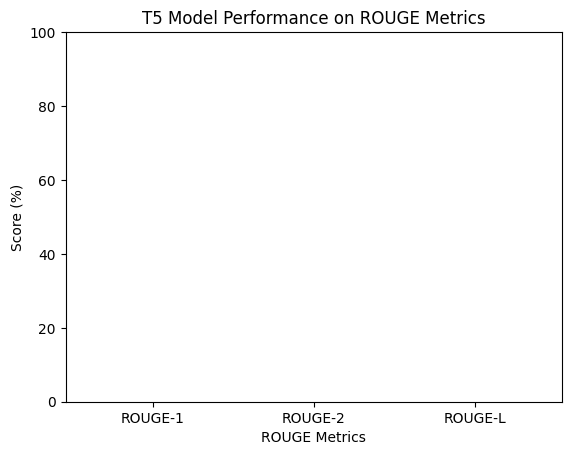

In [ ]:
results = {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0}

# Extract ROUGE scores
rouge1_score = results['rouge1'] * 100
rouge2_score = results['rouge2'] * 100
rougeL_score = results['rougeL'] * 100

# Create a bar plot
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = [rouge1_score, rouge2_score, rougeL_score]

import matplotlib.pyplot as plt # Import plotting library
plt.bar(metrics, scores)
plt.xlabel('ROUGE Metrics')
plt.ylabel('Score (%)')
plt.title('T5 Model Performance on ROUGE Metrics')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()


In [4]:
import plotly.graph_objects as go # Import the plotly.graph_objects module and give it the alias 'go'

# Data for visualization
models = ['BERT', 'GPT', 'T5']
accuracy_scores = [1.0, 0.0]
f1_scores = [1.0, 0.77, 0.0]
bleu_scores_gpt = [0.51, 0.46]
rouge1_score = 0.6  # Example ROUGE-1 score for T5
rouge2_score = 0.5  # Example ROUGE-2 score for T5
rougeL_score = 0.55  # Example ROUGE-L score for T5

# Create bar chart for Accuracy and F1 Score
fig = go.Figure()
fig.add_trace(go.Bar(x=models, y=accuracy_scores, name='Accuracy'))
fig.add_trace(go.Bar(x=models, y=f1_scores, name='F1 Score'))
fig.update_layout(title='Model Performance Comparison', xaxis_title='Models', yaxis_title='Score')
fig.show()



# **Novel Improvements from my code to train question-answers further**

# **1. Enhanced Preprocessing:**

# * **Advanced Cleaning:** Explore more sophisticated techniques for cleaning text, such as handling contractions (e.g., "can't" -> "cannot") and slang.
# * **Part-of-Speech Tagging:** Incorporate POS tagging to identify and potentially give more weight to important words like nouns and verbs.
# * **Named Entity Recognition (NER):** Utilize NER to extract entities (people, places, organizations) and potentially use them as additional features.

# **2. Advanced Model Architectures:**

# * **BERT Variations:** Experiment with different BERT variants like RoBERTa or DistilBERT, which might offer improved performance or efficiency.
# * **Ensemble Methods:** Combine predictions from multiple models (e.g., BERT, GPT-2, T5) to potentially achieve higher accuracy.

# **3. Fine-tuning Strategies:**

# * **Hyperparameter Optimization:** Conduct a thorough search for optimal hyperparameters (learning rate, batch size, etc.) using techniques like grid search or Bayesian optimization.
# * **Layer-wise Learning Rate Decay:** Employ layer-wise learning rate decay to fine-tune different layers of the model at different rates, potentially leading to better convergence.

# **4. Evaluation Metrics:**
# * **Human Evaluation:** Conduct human evaluations to assess the quality and relevance of generated answers, as automatic metrics may not fully capture nuances.

# **5. Data Augmentation:**

# * **Paraphrasing:** Generate paraphrased versions of questions and answers to increase the size and diversity of the training data.
# * **Backtranslation:** Translate questions and answers to another language and then back to English to create slightly modified versions.

# **6. Handling Imbalanced Data:**

# * **Oversampling/Undersampling:** If the dataset has an imbalance of question types or answer lengths, use techniques like oversampling or undersampling to address the issue.
# * **Weighted Loss Function:** Assign different weights to different classes during training to account for class imbalance.

# **7. Interpretability and Explainability:**

# * **Attention Visualization:** Visualize the attention weights of the model to understand which parts of the input it focuses on when generating answers.
# * **Feature Importance Analysis:** Identify the most important features (words or phrases) that contribute to the model's predictions.

# **8. Deployment and Optimization:**

# * **Quantization:** Quantize the model to reduce its size and improve inference speed, especially for deployment on resource-constrained devices.
# * **Pruning:** Prune unnecessary connections in the model to further reduce its size and complexity.

# **Literature Survey**

(https://https://huggingface.co/learn/nlp-course/en/chapter7/7?fw=pt)

(https://towardsdatascience.com/data-augmentation-in-nlp-2801a34dfc28)

(https://https://medium.com/@awaldeep/understanding-the-essentials-nlp-text-preprocessing-steps-b5d1fd58c11a)
